<a href="https://colab.research.google.com/github/rafaeltrinidad/sigNN/blob/master/sigNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import json 
import matplotlib.pyplot as plt
from keras.utils import plot_model
from scipy import stats
from collections import defaultdict

from google.colab import files

Using TensorFlow backend.


In [0]:
# upload the json file form your computer
uploaded = files.upload()

Saving all_in_one.json to all_in_one.json


In [0]:
uploaded

In [0]:

class Data:

    def __init__(self, x, y):

        self.Y = dict(zip(y,[i for i in range(len(y))])) 
        self.x = X(x)
        self.y = Y(y)
        self.zscors = []
        self.angles = [] 
        self.correct_shape = False
        self.seq = []

    def reshape(self):
      
      # reshaping X
      assert self.x.reshaped != True, "Already in a correct shape"
      x = []
      for i in range(0,len(self.x.ORIG)):
        x_data = []
        for j in range(0,len(self.x.ORIG[i])):
          x_data = self.x.points[i][j]
          assert len(x_data) == 42, "ERROR NOT 42"
          x.append(x_data)
      self.x.points = np.array(x)
      self.x.reshaped = True
      
      # reshaping Y
      assert self.x.reshaped == True, "X not reshaped"
      y = []
      for i in range(0,len(self.y.letters)):
        count = 0
        for j in range(0,len(self.x.ORIG[i])):
          y.append(str(i))
          count += 1  
        self.y.counts.append(count)
      self.y.values = y
      self.y.reshaped = True
      self.correct_shape = True

    def plot(self,n):
      xs,ys = [],[]
      assert self.x.reshaped == True, "Reshape it first"
      xs = [-1*self.zscors[n][i] for i in range(0,42,2)]
      ys = [-1*self.zscors[n][i] for i in range(1,42,2)]
      
      plt.plot(xs,ys,'ro')
      plt.title('Letter: ' + str(self.y.letters[int(self.y.values[n])]))
      colors = ['red','green','purple','brown','green']
      for i in range(0,20,4):
        if(i != 8 and i != 12): 
          plt.plot([xs[0],xs[i+1]],[ys[0],ys[i+1]],'k-',color = colors[int(i/4)])
        elif i == 8:
          plt.plot([xs[i+1],xs[i-3]],[ys[i+1],ys[i-3]],'k-',color = colors[int(i/4)])
        elif i == 12:
          plt.plot([xs[i+1],xs[i-3]],[ys[i+1],ys[i-3]],'k-',color = colors[1])
          plt.plot([xs[i+1],xs[i+5]],[ys[i+1],ys[i+5]],'k-',color = colors[1])
        for j in range(0,3):
          plt.plot([xs[i+j+1],xs[i+2+j]],[ys[i+j+1],ys[i+2+j]],'k-',color = colors[int(i/4)]) 
      plt.show()

    def plot_ontop(self,*lst):
      for n in lst:
        xs,ys = [],[]
        assert self.x.reshaped == True, "Reshape it first"
        xs = [-1*self.x.zscors[n][i] for i in range(0,42,2)]
        ys = [-1*self.y.zscors[n][i] for i in range(1,42,2)]
        
        plt.plot(xs,ys,'ro')
        plt.title('Letter: ' + str(self.y.letters[int(self.y.values[n])]))
        colors = ['red','green','purple','brown','black']
        for i in range(0,20,4): 
          plt.plot([xs[0],xs[i+1]],[ys[0],ys[i+1]],'k-',color = colors[int(i/4)])
          for j in range(0,3):
            plt.plot([xs[i+j+1],xs[i+2+j]],[ys[i+j+1],ys[i+2+j]],'k-',color = colors[int(i/4)]) 
      plt.show()

    def z_norm(self):
      assert self.correct_shape == True, "Not in the correct shape"
      assert len(self.zscors) == 0, "Alredy Contains z-scors"
      for i in range(0,len(self.x.points)):
        xs,ys = [],[]
        xs = [self.x.points[i][j] for j in range(0,42,2)]
        ys = [self.x.points[i][j] for j in range(1,42,2)]
        zx,zy = 0,0
        zx, zy = stats.zscore(xs), stats.zscore(ys)
        zscors = []
        for j in range(0,21):
          zscors.append(zx[j])
          zscors.append(zy[j])
        self.zscors.append(zscors)
    
    def calc_angles(self): # not ready
      assert self.correct_shape == True, "Not in the correct shape"
      for n in range(0,len(self.x.points)): 
        xs,ys = [],[]
        xs = [self.x.points[n][i] for i in range(0,42,2)]
        ys = [self.x.points[n][i] for i in range(1,42,2)]
        hand = []
        for j in range(0,20,4):
          finger = []
          p1 = np.array([xs[0],ys[0]])
          p2 = np.array([xs[j+1],ys[j+1]])
          p3 = np.array([xs[j+2],ys[j+3]])
          l1 = p1 - p2
          l2 = p3 - p2
          cosine_angle = np.dot(l1, l2) / (np.linalg.norm(l1) * np.linalg.norm(l2))
          angle0 = np.arccos(cosine_angle)
          finger.append(np.degrees(angle0/360))
          for k in range(2,3):
            a = np.array([xs[j+k],ys[j+k]])
            b = np.array([xs[j+k+1],ys[j+k+1]])
            c = np.array([xs[j+k+2],ys[j+k+2]])
            ba = a - b
            bc = c - b
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle = np.arccos(cosine_angle)
            finger.append(np.degrees(angle)/360)
          hand.append(finger)
        self.angles.append(hand)
      #self.angles = np.array(self.angles)

    def remove(self,n): # *args and **kwargs should be used
      if(type(n)==int):
        remove_p,remove_z = [],[]
        self.x.points = np.delete(self.x.points,n,axis=0)
        self.zscors = np.delete(self.zscors,n,axis=0)
        self.y.values = np.delete(self.y.values,n,axis=0)
        print(type(n))
      
      else:
        for i in range(0,len(n)):
          assert self.correct_shape == True, "Reshape it first" ### NOT TESTED
          remove_p,remove_z = [],[]
          self.x.points = np.delete(self.x.points,n[i],axis=0)
          self.zscors = np.delete(self.zscors,n[i],axis=0)
          self.y.values = np.delete(self.y.values,n[i],axis=0)
    
    # def sequence(self,letters):
    #   #  dict1 = [ i for i in self.y[letters] 
    #    seq1 = [val]
    #    for i in range(len(self.y.counts)):
    #     cnt += 1
    #     seq = []
    #     for j in range(2):
    #       # if()
    #       hand = self.zscors[0+] 
    #       seq.append(hand)
    #     self.seq.append(seq)
    #     for j in range(self.y.counts[i])

        return sequence# the actual sequenced list of the corresponding datavalues





class Train(Data):
    pass
  
class Test(Data):
    pass

class X():

  def __init__(self,values):
    self.points = values
    self.reshaped = False
    self.ORIG = values

class Y():

  def __init__(self,values):
    self.letters = values
    self.values = []
    self.reshaped = False
    self.counts = []
    self.ORIG = values

# Global Functions

def history_plot(my_model):
  print([ i for i in my_model.history.keys()])
  # Plot training & validation accuracy 
  plt.plot(my_model.history['acc'])
  plt.plot(my_model.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss 
  plt.plot(my_model.history['loss'])
  plt.plot(my_model.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

def plot_predict(predictions):
  # dict of wrong predictioins
  dict_flaws={}
  for i in range(0,len(predictions)):
    pp = np.argmax(predictions[i])
    AA = int(test.y.values[i])
    if (pp != AA):
      dict_flaws.update({str(i):[pp,AA]})

  # group py the predected letter =>>>>> dict{predicted letter:[[picture number,Accuracy][][]...]}
  flaws = defaultdict(list) 
  for key, val in sorted(dict_flaws.items()): 
      flaws[val[0]].append([key,val[1]]) 

  print(flaws, '\n\n')
  for i in flaws.keys():
    print(str(test.y.letters[i]),': ',len(flaws[i]))
  print('\n\n',"In Total: ",len(flaws),'\n\n')

  # plot wrong predictions
  for i in flaws.keys():
    for j in range(0,len(flaws[i])):
      A = flaws[i][j][1]
      n = int(flaws[i][j][0])
      
      xss = [-1*test.zscors[n][s] for s in range(0,42,2)]
      yss = [-1*test.zscors[n][s] for s in range(1,42,2)]
      # xs = [test.zscors[n][s] for s in range(0,42,2)]
      # ys = [test.zscors[n][s] for s in range(1,42,2)]
      
      if(j == 0):
        print('Falsely predicted: '+str(test.y.letters[i]))
        print('\n')
      # plt.subplot(1,len(flaws[i]),j+1)  
      plt.figure(figsize=(3,3))
      plt.plot(xss,yss,'ro')
      plt.title('Actually:  '+ str(test.y.letters[A]) + '     (' +str(n)+')')
      # plt.suptitle('predicted:'+str(test.y.letters[i])+', Actually '+str(test.y.letters[A ])+ '\n'+ " "+'\n'+" "+ '\n')
      plt.tight_layout()
      colors = ['red','green','purple','brown','black']
      for j in range(0,20,4): 
        plt.plot([xss[0],xss[j+1]],[yss[0],yss[j+1]],'k-',color = colors[int(j/4)])
        for k in range(0,3):
          plt.plot([xss[k+j+1],xss[k+2+j]],[yss[k+j+1],yss[k+2+j]],'k-',color = colors[int(j/4)]) 
    plt.show()
    print('\n\n')


In [0]:

filename = list(i for i in uploaded.keys())[0]
print(filename) ###
enc = uploaded[filename] 
dec = json.loads(enc.decode('utf-8'))
x = [i for i in dec.values()]
y = [i for i in dec.keys()]

# the train/test split (run it once)
ytest = y
xtest = []
split = False
for i in range(0,len(x)):
  l = int(len(x[i])*20/100) # 20% of the data for testing
  xt = []
  for j in range(0,l):
    r = np.random.randint(low = 0, high = len(x[i]))
    xt.append(x[i].pop(r))
  xtest.append(xt)


all_in_one.json


In [0]:
# initialize train and test
train = Train(x,y)
test = Test(xtest,ytest)

train.reshape()
test.reshape()
train.z_norm()
test.z_norm()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


CHOOSE THE MODEL

In [0]:
print(len(train.y.values))
print(len(train.zscors))
# points and zscors
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(42,)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(24, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

my_model = model.fit(np.array(train.zscors), np.array(train.y.values), validation_data=(np.array(test.zscors), np.array(test.y.values)), epochs=10, shuffle=True)
model.evaluate(np.array(test.zscors), np.array(test.y.values), verbose=2,)

# to compare predictions with actual data
prediction = model.predict(np.array(test.zscors))

5255
5255
Epoch 1/10


UnimplementedError: ignored

['loss', 'acc', 'val_loss', 'val_acc']


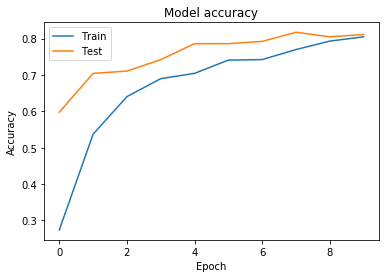

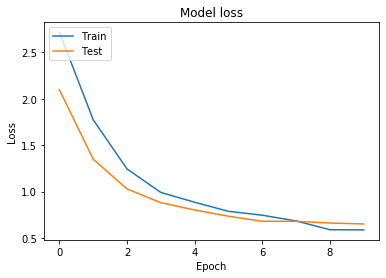

In [0]:
history_plot(my_model)

In [0]:
total = 0
for i in range(0,24):
  total =+ len(x[i])
  print(y[i],len(x[i]))

G 33
V 19
Y 28
A 33
E 33
L 25
R 32
W 31
Q 12
T 24
I 61
P 17
H 20
F 32
O 30
U 30
M 23
B 31
N 13
D 36
K 28
X 32
S 32
C 32


defaultdict(<class 'list'>, {15: [['10', 1]], 6: [['103', 15], ['108', 15]], 20: [['11', 1]], 3: [['111', 16], ['122', 18], ['148', 22], ['150', 22], ['151', 22], ['34', 4], ['60', 9]], 18: [['112', 16]], 9: [['121', 18], ['145', 22], ['146', 22], ['147', 22], ['149', 22], ['31', 4], ['33', 4]], 10: [['128', 19]], 1: [['134', 20]], 11: [['144', 21], ['55', 8]], 0: [['155', 23], ['83', 12]], 16: [['32', 4], ['8', 1], ['99', 14]], 21: [['45', 6]], 19: [['9', 1]]}) 


U :  1
R :  2
K :  1
A :  7
N :  1
T :  7
I :  1
V :  1
P :  2
G :  2
M :  3
X :  1
D :  1


 In Total:  13 


Falsely predicted: U




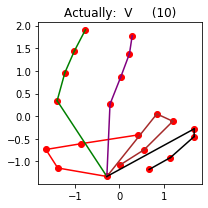




Falsely predicted: R




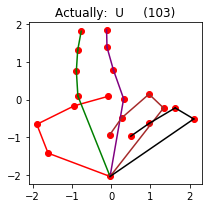

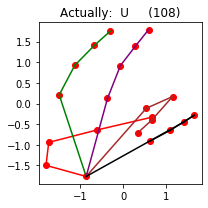




Falsely predicted: K




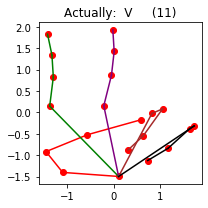




Falsely predicted: A




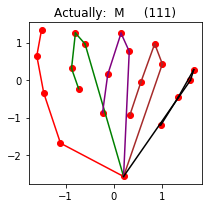

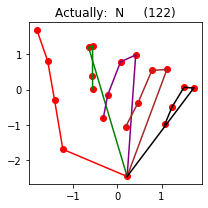

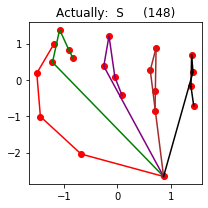

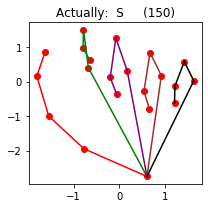

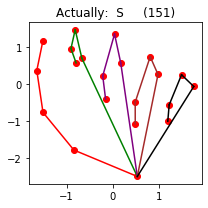

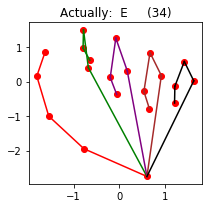

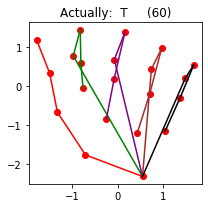




Falsely predicted: N




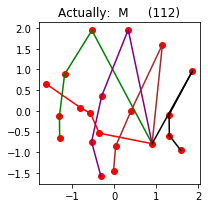




Falsely predicted: T




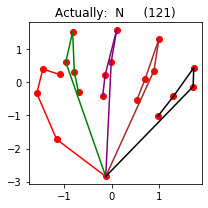

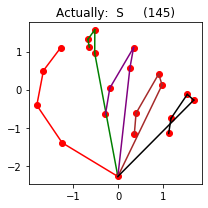

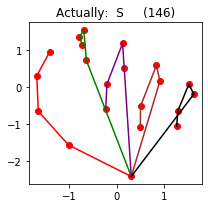

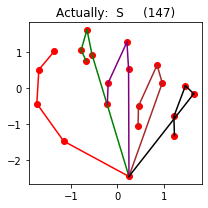

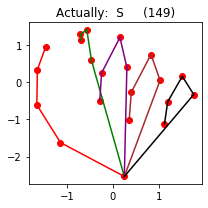

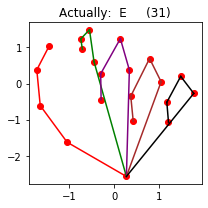

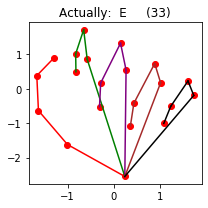




Falsely predicted: I




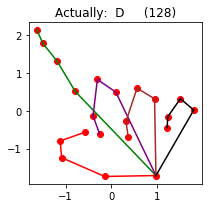




Falsely predicted: V




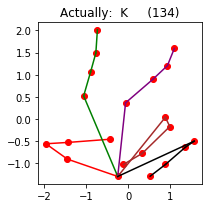




Falsely predicted: P




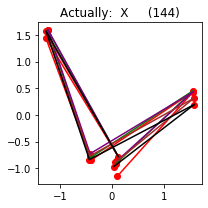

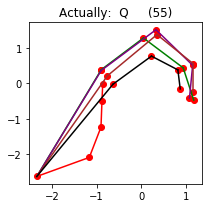




Falsely predicted: G




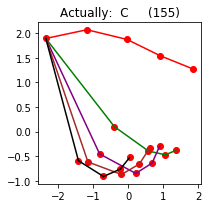

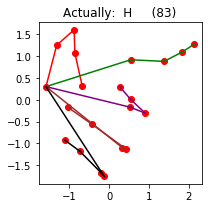




Falsely predicted: M




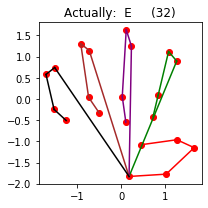

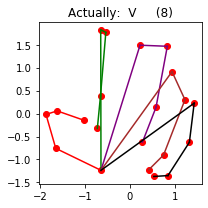

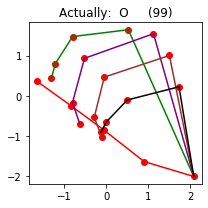




Falsely predicted: X




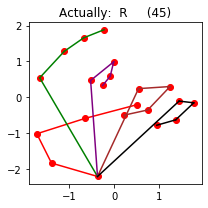




Falsely predicted: D




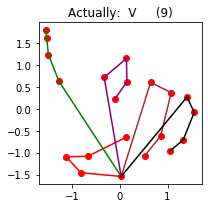

In [0]:

plot_predict(prediction)

In [0]:
for i in range(0,200):
  test.plot(i)

In [0]:
#test.remove(81)

In [0]:
test.plot_ontop(90,91,92,93)

AttributeError: ignored

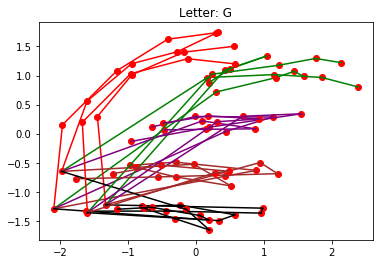

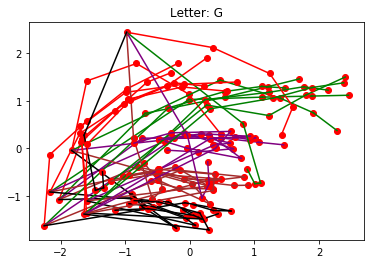

In [0]:
test.plot_ontop(0,1,2,3,4,5,6,7)

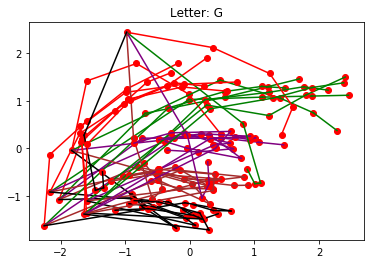

In [0]:
test.plot_ontop(0,1,2,3,4,5,6,7)

Ideas:
- Add the angele between 3 points to the input set.
- Calssify the state of the finger (open/closed).